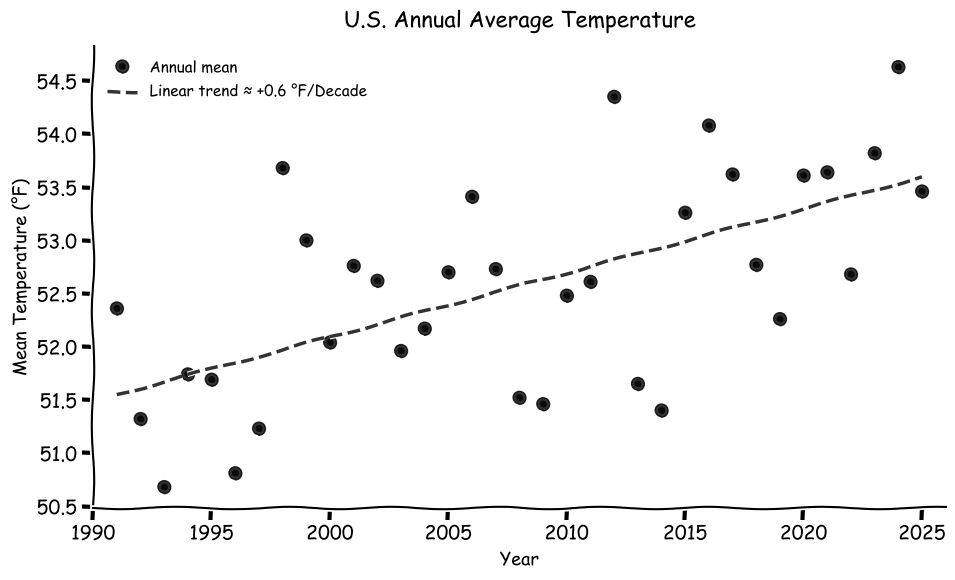

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


filename = 'data.csv'
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()

yearly_avg = (
    df.groupby('Year', as_index=False)['Temperature']
      .mean()
      .rename(columns={'Temperature': 'Mean_Temperature'})
)
yearly_avg['Mean_Temperature'] = yearly_avg['Mean_Temperature'].round(2)

years = yearly_avg['Year']
temps = yearly_avg['Mean_Temperature']

slope, intercept = np.polyfit(years, temps, 1)
trend_line = slope * years + intercept
trend_label = f'Linear trend ≈ {10*slope:+.1f} °F/Decade'

# --- XKCD STYLE ---
with plt.xkcd(scale=1.2, length=120, randomness=2):
    fig, ax = plt.subplots(figsize=(11, 6), dpi=100)

    ax.plot(years, temps, 'o', markersize=9, color='black', alpha=0.8, label='Annual mean')
    ax.plot(years, trend_line, '--', lw=2.5, color='black', alpha=0.8, label=trend_label)

    ax.set_title('U.S. Annual Average Temperature', fontsize=16, pad=14)
    ax.set_xlabel('Year', fontsize=13)
    ax.set_ylabel('Mean Temperature (°F)', fontsize=13)
    ax.set_xlim(1990, 2026)
    ax.set_xticks(range(1990, 2026 + 1, 5))  # every 5 years
    ax.legend(loc='upper left', fontsize=11, frameon=False)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

#prevent font warnings 
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

